# Обработка данных с Pandas

[Pandas](https://pandas.pydata.org/) — это библиотека, которая использует `концепцию структурированных массивов` и строит ее с помощью множества удобных методов, улучшений для разработчиков и лучшей автоматизации. 

Если нужно импортировать данные практически из любого места, очищать их , изменять их форму, а затем экспортировать практически в любой формат, то pandas — это наилучшее решение. 

Вполне вероятно, что в какой-то момент `import numpy as np` будет заменяться `import pandas as pd` с ростом сложности задач.

Библиотека Pandas используется для работы с табличными данными (аналогично данным, хранящимся в электронной таблице). Она предоставляет вспомогательные функции для чтения данных из различных форматов файлов, таких как CSV, электронные таблицы Excel, таблицы HTML, JSON, SQL и другие. 

## Чтение файла CSV с помощью pandas

Мы уже знаем о формате хранения данных CSV. Вспомним, что он из себя представляет 

`**CSV файл** представляет собой текстовый файл с разделителями, в котором для разделения значений используется запятая. Каждая строка файла представляет собой запись данных. Запись состоит из одного или нескольких полей, разделенных запятыми. Файл CSV обычно хранит табличные данные (числа и текст) в виде обычного текста, и в этом случае каждая строка будет иметь одинаковое количество полей.`

Скачаем файл [Akhmatova places in Moscow.csv](https://github.com/SerjiEvg/data-analysis/raw/main/data/Akhmatova%20places%20in%20Moscow.csv) при помощи библиотеки `urlretrieve` из модуля `urllib.request`. И импортируем его в наш проект

In [5]:
from urllib.request import urlretrieve

Теперь мы можем скачать файл по ссылке при помощи функции urlretrieve()

In [6]:
Akhmatova_places = 'https://github.com/SerjiEvg/data-analysis/raw/main/data/Akhmatova%20places%20in%20Moscow.csv'

urlretrieve(Akhmatova_places, 'Akhmatova places in Moscow.csv')

('Akhmatova places in Moscow.csv', <http.client.HTTPMessage at 0x25e1e27b4c0>)

обратите внимание, что данная функция принимает минимум один параметр, а именно ссылку на файл. Если же нужно сохранить данный файл под другим именем, тогда это можно указать в виде строки вторым параметром.

В возвращенном объекте - первый параметр хранит наименование файла, а второй - адрес, произведенного запроса в репозиторий.

Чтобы прочитать файл, мы можем использовать метод `read_csv` из библиотеки pandas. Язык Python изначально не хранит эту библиотеку, поэтому ее необходимо установить. Это делается помощи менеджера `pip3`:

In [3]:
!pip3 install pandas --upgrade -q

     |████████████████████████████████| 12.2 MB 4.8 MB/s 


Теперь мы можем импортировать модуль pandas и считать данные из уже скачанного файла `Akhmatova places in Moscow.csv`. По соглашению он импортируется с псевдонимом `pd`. 

In [7]:
import pandas as pd

In [8]:
akhmatova_df = pd.read_csv('Akhmatova places in Moscow.csv')

Данные из файла считываются и сохраняются в объекте `akhmatova_df`, который имеет структуру `DataFrame` — это одна из основных структур данных в библиотеке pandas для хранения и работы с табличными данными. В этом мы можем убедиться, используя команду `type`:

In [9]:
type(akhmatova_df)

pandas.core.frame.DataFrame

Теперь переменная `akhmatova_df` хранит наши данные и мы можем их вывести на экран

In [4]:
print(akhmatova_df)

                                   address  \
0   Зачатьевский 2-й переулок, 2 стр. 1-19   
1             Зачатьевский 3-й переулок, 3   
2               Большая Ордынка, 17 стр. 1   
3             Андропова проспект 39 стр. 1   
4          Проспект Академика Сахарова, 37   
5                    Большая Никитская, 13   
6                            Поварская, 20   
7                     Тверской бульвар, 24   
8                   Померанцев переулок, 3   
9                   Померанцев переулок, 8   
10                   Никитский бульвар, 25   
11                    Хорошевское шоссе, 8   
12         Котельническая Набережная, 1/15   
13                    Мясницкая, 21 стр. 1   
14               Карманицкий переулок, 2/5   
15   Большой Николопесковский переулок, 12   
16                      Сивцев Вражек, 6/2   
17                         Тверская, 8 к 1   
18              Садовая-Каретная, 8 стр. 1   
19                Проспект Мира, 51 стр. 1   
20               Лаврушинский пере

Мы можем просмотреть некоторую базовую информацию о фрейме данных, используя метод info().

In [8]:
print(akhmatova_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        24 non-null     object 
 1   entity         24 non-null     object 
 2   relation       24 non-null     object 
 3   current_state  23 non-null     object 
 4   source         24 non-null     object 
 5   latitude       24 non-null     float64
 6   longitude      24 non-null     float64
dtypes: float64(2), object(5)
memory usage: 1.4+ KB
None


Здесь видно, что каждый столбец имеет свой тип, а также информацию о количестве пустых значений для каждого столбца, занимаемую память и т.д.

Сделаем загрузку еще одного файла - [Surface meteorological data.csv](https://github.com/SerjiEvg/data-analysis/raw/main/data/Surface%20meteorological%20data.csv). Обработаем его с помощью  методов Pandas.

In [10]:
meteo_df = pd.read_csv('https://github.com/SerjiEvg/data-analysis/raw/main/data/Surface%20meteorological%20data.csv')

meteo_df

,Наименование агентства,Год,Месяц,Регион,Отклонение от нормы,Осадки
0,Росгидромет,2016,февраль,Тверская область,-1.4,29.0
1,Росгидромет,2016,февраль,Московская область,-1.7,27.0
2,Росгидромет,2016,февраль,Смоленская область,-0.9,32.0
3,Росгидромет,2016,февраль,Костромская область,-2.5,42.0
4,Росгидромет,2016,февраль,Ярославская область,-1.4,32.0
...,...,...,...,...,...,...
78,Росгидромет,2016,февраль,Kамчатский край,-16.0,23.0
79,Росгидромет,2016,февраль,Xабаровский край,-21.9,8.0
80,Росгидромет,2016,февраль,Приморский край,-11.7,15.0
81,Росгидромет,2016,февраль,Сахалинская область,-13.4,41.0


Теперь мы можем просмотреть статистическую информацию для числовых столбцов (среднее значение, стандартное отклонение, минимальное/максимальное значение и количество непустых значений), используя метод `describe()`.

In [10]:
print(meteo_df.describe())

          Год  Отклонение от нормы     Осадки
count    83.0            81.000000  82.000000
mean   2016.0            -5.681481  31.378049
std       0.0             8.213649  15.088742
min    2016.0           -32.300000   5.000000
25%    2016.0            -9.100000  19.250000
50%    2016.0            -3.000000  32.000000
75%    2016.0            -0.600000  40.750000
max    2016.0             6.400000  72.000000


Свойство columns cодержит список наименований столбцов в фрейме данных.

In [11]:
print(meteo_df.columns)

Index(['Наименование агентства', 'Год', 'Месяц', 'Регион',
       'Отклонение от нормы', 'Осадки'],
      dtype='object')


Мы также можем получить количество строк и столбцов во фрейме данных, используя, уже известный нам, метод shape.

In [ ]:
meteo_df.shape

(83, 6)

Вот небольшая шпаргалка тех методов, которые мы использовали, а также их небольшое описание о действиях, которые они выполняют

- pd.read_csv() - чтение данных из файла CSV в объект DataFrame
- .info()- просмотр основной информации о файле(о строках, столбцах и типах данных)
- .describe()-  просмотр статистической информации о числовых столбцах
- .columns- получение списка имен столбцов
- .shape- получение количества строк и столбцов в виде кортежа

## Получение данных из фрейма

Для дальнейшей работы загрузим данные из файла [COVID-19 data by regions of RUSSIA.csv](https://github.com/SerjiEvg/data-analysis/blob/main/data/COVID-19%20data%20by%20regions%20of%20RUSSIA.csv?raw=true), в котором представлена статистика по коронавирусу в регионах РФ. 

Так как в файле разделителем является точка с запятой, а не запятая (принятая по умолчанию), мы должны указать необязательный параметр - разделитель sep=';'. Иначе данные будут считаны неправильно.

In [12]:
covid_df = pd.read_csv('https://github.com/SerjiEvg/data-analysis/blob/main/data/COVID-19%20data%20by%20regions%20of%20RUSSIA.csv?raw=true', sep=';')

После преобразования данных в DataFrame, смотрим что получилось

In [13]:
covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN
...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN


Первое с чего приходится начинать - получение данных из фрейма, например, подсчеты за определенный день или список значений в определенном столбце. Для этого может помочь понять внутреннее представление данных во фрейме данных. Концептуально вы можете думать о кадре данных как о словаре списков: ключи — это имена столбцов, а значения — это списки/массивы, содержащие данные для соответствующих столбцов.

In [15]:
# Формат Pandas подобен этому
covid_data_dict = {
    'дата':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'случаи заболевания':  [1444, 1365, 996, 975, 1326],
    'население': [53541, 42583, 54395, None, None],
    'количество смертей': [1, 4, 6, 8, 6]
}

Представление данных в указанном выше формате имеет следующие преимущества:

- Все значения в столбце обычно имеют одинаковый тип значения, поэтому лучше хранить их в одном массиве.
- Извлечение значений для конкретной строки просто требует извлечения элементов с заданным индексом из каждого массива столбцов.
- Представление более компактное (имена столбцов записываются только один раз) по сравнению с другими форматами, использующими словарь для каждой строки данных (см. пример ниже).

In [ ]:
# Формат Pandas не соответствует этому
covid_data_list = [
    {'дата': '2020-08-30', 'случаи заболевания': 1444, 'население': 53541, 'количество смертей': 1},
    {'дата': '2020-08-31', 'случаи заболевания': 1365, 'население': 42583, 'количество смертей': 4},
    {'дата': '2020-09-01', 'случаи заболевания': 996, 'население': 54395, 'количество смертей': 6},
    {'дата': '2020-09-02', 'случаи заболевания': 975, 'количество смертей': 8 },
    {'дата': '2020-09-03', 'случаи заболевания': 1326, 'количество смертей': 6},
]

Теперь зная, что DataFrame похож на словарь, стало понятнее как извлекать информацию из фрейма данных. То есть, мы можем получить список значений из определенного столбца, используя обращение по ключу.

Допустим, нам необходимо извлечь все значения из столбца случаи заболевания, поэтому в квадратных скобках указываем наименование этого столбца и получаем все значения, ключом которых является строка  случаи заболевания

In [16]:
covid_data_dict['случаи заболевания']

[1444, 1365, 996, 975, 1326]

Такое же обращение можно сделать и к объекту  DataFrame

In [17]:
covid_df['случаи заболевания']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
9957    144.0
9958      5.0
9959      NaN
9960    248.0
9961     44.0
Name: случаи заболевания, Length: 9962, dtype: float64

Здесь кроме значений, нам представлено наименование столбца, а также сколько значений было найдено, которые соответствуют этому ключу и тип данных этого столбца.

Каждый столбец представлен с помощью структуры данных, называемой Series, которая по сути представляет собой пустой массив с некоторыми дополнительными методами и свойствами. В этом можно убедиться, если запросить тип этого столбца

In [ ]:
type(covid_df[['случаи заболевания', , ]])

pandas.core.series.Series

Получить конкретное значение с помощью ряда возможно с помощью нотации индексации [], указав наименование столбца и индекс строки

In [ ]:
covid_df['случаи заболевания'][6432]

53.0

или же другой аналогичный пример 

In [ ]:
covid_df['население'][6432]

2599301

pandas также предоставляет возможность прямого извлечения элемента из определенной строки и столбца, при помощи метода .at .

In [ ]:
covid_df.at[6432, 'случаи заболевания']

53.0

то есть вы можете в одних квадратных скобках указать сразу два параметра (строка и столбец)

In [18]:
covid_df.at[6432, 'население']

2599301

Вместо указания строки в квадратных скобках также позволительно обращаться к столбцам как к свойствам фрейма данных, используя нотацию .. Однако этот метод работает только для столбцов, имена которых не содержат пробелов или специальных символов.

Например,

In [20]:
covid_df['население']

0        986109
1       2317052
2        790676
3       1092277
4       1005967
         ...   
9957    3466960
9958    1476752
9959      50726
9960     544008
9961    1253189
Name: население, Length: 9962, dtype: int64

Кроме того, возможно передать список столбцов в нотации индексации [], чтобы получить доступ только к части фрейма данных с заданными столбцами (то есть метод at можно заменить на двойные квадратные скобки указать в нем, например, наименования столбцов)

In [ ]:
cases_df = covid_df[['дата', 'случаи заболевания']]
print(cases_df)

            дата  случаи заболевания
0     25.02.2020                 NaN
1     25.02.2020                 NaN
2     25.02.2020                 NaN
3     25.02.2020                 NaN
4     25.02.2020                 NaN
...          ...                 ...
9957  30.06.2020               144.0
9958  30.06.2020                 5.0
9959  30.06.2020                 NaN
9960  30.06.2020               248.0
9961  30.06.2020                44.0

[9962 rows x 2 columns]


Новый фрейм данных cases_df— это просто «просмотр» исходного фрейма данных covid_df. Оба указывают на одни и те же данные в памяти. Изменение любых значений внутри одного из них также изменит соответствующие значения в другом. Совместное использование информации между фреймами данных делает работу с данными в pandas невероятно быстрой. Не нужно беспокоиться о накладных расходах на копирование тысяч или миллионов строк каждый раз, когда мы хотим создать новый фрейм данных, работая с существующим.

Иногда может понадобиться полная копия первоначального фрейма данных, и в этом случае мы можем использовать метод  copy.

In [ ]:
covid_df_copy = covid_df.copy()

Данные внутри covid_df_copy полностью отделены от параметра  covid_df, и изменение значений внутри одного из них не повлияет на скопированный объект. Это очень удобно, когда вам требуется взаимодействовать с первоначальным DataFrame и его подмножествами.

Для доступа к определенной строке данных библиотека pandas предоставляет метод .loc.

In [ ]:
print(covid_df.loc[243])

Регион                             Тульская область
Федеральный округ     Центральный федеральный округ
дата                                     07.03.2020
случаи заболевания                              NaN
население                                   1466025
количество смертей                              NaN
Name: 243, dtype: object


Каждая полученная строка также является Series объектом.

In [ ]:
type(covid_df.loc[4326])

pandas.core.series.Series

Если необходимо получить несколько первых записей из DataFrame, мы можем использовать метод head() 

In [ ]:
print(covid_df.head(5))

                 Регион                   Федеральный округ        дата  \
0     Республика Бурятия  Дальневосточный федеральный округ  25.02.2020   
1         Алтайский край        Сибирский федеральный округ  25.02.2020   
2       Амурская область  Дальневосточный федеральный округ  25.02.2020   
3  Архангельская область  Северо-Западный федеральный округ  25.02.2020   
4   Астраханская область            Южный федеральный округ  25.02.2020   

   случаи заболевания  население  количество смертей  
0                 NaN     986109                 NaN  
1                 NaN    2317052                 NaN  
2                 NaN     790676                 NaN  
3                 NaN    1092277                 NaN  
4                 NaN    1005967                 NaN  


или же метод tail(), чтобы получить несколько последних строк данных

In [ ]:
print(covid_df.tail(4))

                              Регион                     Федеральный округ  \
9958             Чеченская Республика  Северо-Кавказский федеральный округ   
9959                     Чукотский АО    Дальневосточный федеральный округ   
9960  Ямало-Ненецкий автономный округ          Уральский федеральный округ   
9961              Ярославская область        Центральный федеральный округ   

            дата  случаи заболевания  население  количество смертей  
9958  30.06.2020                 5.0    1476752                 NaN  
9959  30.06.2020                 NaN      50726                 NaN  
9960  30.06.2020               248.0     544008                 NaN  
9961  30.06.2020                44.0    1253189                 NaN  


Обратите внимание, что первые несколько значений в столбцах случаи заболевания и количество смертей равны. Это связано с тем, что файл CSV не содержит данных для столбца за определенные даты (вы можете убедиться в этом, заглянув в файл). Эти значения могут отсутствовать или быть неизвестными.

Например,

In [ ]:
covid_df.at[0, 'количество смертей']

nan

но при этом тип всегда известен

In [ ]:
type(covid_df.at[0, 'количество смертей'])

numpy.float64

`Различие между 0 и NaN тонкое, но важное. В этом наборе данных это означает, что о случаях заболеваний не сообщалось в определенные даты (NaN). `

Мы можем найти первый индекс, который не содержит значения, используя метод first_valid_index() для столбца со значением NaN .

Например,

In [ ]:
covid_df['случаи заболевания'].first_valid_index()

115

в этом наборе, где значение равно NaN находится в записи с индексом 115

Давайте посмотрим на несколько строк до и после этого индекса, чтобы убедиться, что значения меняются с NaNна фактические числа. Мы можем сделать это, передав диапазон в loc в виде среза:

In [ ]:
print(covid_df.loc[110:120])

                   Регион                   Федеральный округ        дата  \
110        Курская область      Центральный федеральный округ  06.03.2020   
111  Ленинградская область  Северо-Западный федеральный округ  06.03.2020   
112       Липецкая область      Центральный федеральный округ  06.03.2020   
113    Магаданская область  Дальневосточный федеральный округ  06.03.2020   
114                Москва       Центральный федеральный округ  06.03.2020   
115        Московская обл.      Центральный федеральный округ  06.03.2020   
116     Мурманская область  Северо-Западный федеральный округ  06.03.2020   
117            Ненецкий АО  Северо-Западный федеральный округ  06.03.2020   
118  Нижегородская область      Приволжский федеральный округ  06.03.2020   
119   Новгородская область  Северо-Западный федеральный округ  06.03.2020   
120  Новосибирская область        Сибирский федеральный округ  06.03.2020   

     случаи заболевания  население  количество смертей  
110               

Или же использовать метод sample для извлечения случайной выборки строк из фрейма данных:

In [ ]:
print(covid_df.sample(10))

                           Регион                   Федеральный округ  \
4750            Ростовская область            Южный федеральный округ   
3055         Новосибирская область        Сибирский федеральный округ   
553              Республика Адыгея            Южный федеральный округ   
8946          Белгородская область      Центральный федеральный округ   
3223            Пензенская область      Приволжский федеральный округ   
9469               Камчатский край  Дальневосточный федеральный округ   
4362  Еврейская автономная область  Дальневосточный федеральный округ   
8719                   Ненецкий АО  Северо-Западный федеральный округ   
4275         Волгоградская область            Южный федеральный округ   
5615              Тульская область      Центральный федеральный округ   

            дата  случаи заболевания  население  количество смертей  
4750  30.04.2020                79.0    4195327                 3.0  
3055  10.04.2020                 3.0    2798251         

Обратите внимание, что хотя мы взяли случайную выборку, исходный индекс каждой строки сохраняется — это полезное свойство фреймов данных.

Небольшая шпаргалка с описанием методов:

- **covid_df['случаи заболевания']** - получение столбцов как с Seriesиспользованием имени столбца
- **new_cases[6432]** - получение значений из Series с помощью индекса
- **covid_df.at[6432, 'случаи заболевания']** - получение одного значения из фрейма данных
- **covid_df.copy()** - создание глубокой копии фрейма данных
- **covid_df.loc[6432]** - получение строки или диапазона строк данных из фрейма данных
- **head(), tail(), и sample()** - получение нескольких строк данных из фрейма данных
- **covid_df['случаи заболевания'].first_valid_index()** - нахождение первого непустого индекса в серии

# Группировка и агрегация

In [21]:
from urllib.request import urlretrieve
import pandas as pd

covid_data = 'https://github.com/SerjiEvg/data-analysis/blob/main/data/COVID-19%20data%20by%20regions%20of%20RUSSIA.csv?raw=true'
urlretrieve(covid_data, 'COVID-19 data by regions of RUSSIA.csv')
covid_df = pd.read_csv('COVID-19 data by regions of RUSSIA.csv', sep=';')

In [26]:
covid_df.head(7)

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN
5,Белгородская область,Центральный федеральный округ,25.02.2020,NaN,1547532,NaN
6,Брянская область,Центральный федеральный округ,25.02.2020,NaN,1192570,NaN


In [27]:
covid_df.дата

0       25.02.2020
1       25.02.2020
2       25.02.2020
3       25.02.2020
4       25.02.2020
           ...    
9957    30.06.2020
9958    30.06.2020
9959    30.06.2020
9960    30.06.2020
9961    30.06.2020
Name: дата, Length: 9962, dtype: object

## Работа с датами

Хотя мы рассмотрели общие цифры по случаям, населению и т.д., было бы также полезно изучать и анализировать данные по месяцам. Библиотека pandas также предоставляет методы и свойства для работы с типами данных date.

Например, мы можем вывести столбец date, обращаясь к нему по ключевому слову

In [28]:
covid_df.дата

0       25.02.2020
1       25.02.2020
2       25.02.2020
3       25.02.2020
4       25.02.2020
           ...    
9957    30.06.2020
9958    30.06.2020
9959    30.06.2020
9960    30.06.2020
9961    30.06.2020
Name: дата, Length: 9962, dtype: object

В выведенном результате время имеет тип object, так как библиотека pandas не знает, что этот столбец является датой. Мы можем преобразовать этот столбец в datetime, используя метод pd.to_datetime.

In [29]:
covid_df['date'] = pd.to_datetime(covid_df.дата)

covid_df['date']

0      2020-02-25
1      2020-02-25
2      2020-02-25
3      2020-02-25
4      2020-02-25
          ...    
9957   2020-06-30
9958   2020-06-30
9959   2020-06-30
9960   2020-06-30
9961   2020-06-30
Name: date, Length: 9962, dtype: datetime64[ns]

После преобразования столбец date имеет тип данных datetime64. Теперь мы можем извлечь из него разные части данных в отдельные столбцы, используя класс DatetimeIndex .

In [30]:
covid_df['Год'] = pd.DatetimeIndex(covid_df.date).year
covid_df['Месяц'] = pd.DatetimeIndex(covid_df.date).month
covid_df['День'] = pd.DatetimeIndex(covid_df.date).day
covid_df['Неделя'] = pd.DatetimeIndex(covid_df.date).weekday

covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,date,Год,Месяц,День,Неделя
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,2020-02-25,2020,2,25,1
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,2020-02-25,2020,2,25,1
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,2020-02-25,2020,2,25,1
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,2020-02-25,2020,2,25,1
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,2020-02-25,2020,2,25,1
...,...,...,...,...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,2020-06-30,2020,6,30,1
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,2020-06-30,2020,6,30,1
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,2020-06-30,2020,6,30,1
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,2020-06-30,2020,6,30,1


Мы назвали один из столбцов Неделя для краткости, на самом деле числа в столбце обозначают дни недели.

Давайте проверим общие данные за май. Мы можем запросить строки за май, выбрать подмножество столбцов и использовать метод sum() для агрегирования значений каждого выбранного столбца.

In [31]:
covid_df_may = covid_df[covid_df.Месяц == 5]
covid_df_may

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,date,Год,Месяц,День,Неделя
2611,Алтайский край,Сибирский федеральный округ,05.04.2020,NaN,2317052,NaN,2020-05-04,2020,5,4,0
2612,Амурская область,Дальневосточный федеральный округ,05.04.2020,NaN,790676,NaN,2020-05-04,2020,5,4,0
2613,Архангельская область,Северо-Западный федеральный округ,05.04.2020,NaN,1092277,NaN,2020-05-04,2020,5,4,0
2614,Астраханская область,Южный федеральный округ,05.04.2020,NaN,1005967,NaN,2020-05-04,2020,5,4,0
2615,Белгородская область,Центральный федеральный округ,05.04.2020,NaN,1547532,NaN,2020-05-04,2020,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...
7832,Чеченская Республика,Северо-Кавказский федеральный округ,05.06.2020,15.0,1476752,NaN,2020-05-06,2020,5,6,2
7833,Чукотский АО,Дальневосточный федеральный округ,05.06.2020,6.0,50726,NaN,2020-05-06,2020,5,6,2
7834,Ямало-Ненецкий автономный округ,Уральский федеральный округ,05.06.2020,45.0,544008,NaN,2020-05-06,2020,5,6,2
7835,Ярославская область,Центральный федеральный округ,05.06.2020,71.0,1253189,NaN,2020-05-06,2020,5,6,2


In [ ]:
# Запрос строк за May
covid_df_may = covid_df[covid_df.Месяц == 5]

# Выделение подмножества столбцов для агрегации
covid_df_may_metrics = covid_df_may[['случаи заболевания', 'количество смертей', 'население']]

# Возвращение сумм по столбцам
covid_may_totals = covid_df_may_metrics.sum()

covid_may_totals

случаи заболевания    1.930860e+05
количество смертей    2.811000e+03
население             3.228077e+09
dtype: float64

Мы также можем объединить вышеуказанные операции в один оператор.

In [ ]:
covid_df[covid_df.Месяц == 5][['случаи заболевания', 'количество смертей', 'население']].sum()

случаи заболевания    1.930860e+05
количество смертей    2.811000e+03
население             3.228077e+09
dtype: float64

В качестве другого примера давайте проверим, превышает ли количество случаев, зарегистрированных по воскресеньям, среднее количество случаев, регистрируемых каждый день. На этот раз мы можем захотеть агрегировать столбцы с помощью метода mean().

In [ ]:
# Вычисление среднего
covid_df['случаи заболевания'].mean()

88.91244682310965

In [ ]:
# Среднее по воскресеньям
covid_df[covid_df.Неделя == 6]['случаи заболевания'].mean()

95.99914893617022

Похоже, что по воскресеньям было зарегистрировано больше случаев, чем в другие дни.

Теперь вы знаете основные моменты работы с библиотекой pandas и можете приступать к заданиям.

## Группировка данных

Перейдем к следующему шагу: будем обобщать дневные данные, и для этого создадим новый DataFrame с месячными данными. 

Чтобы решить эту задачу мы можем использовать функцию groupby(). Функция groupby() модуля pandas используется для разделения (выделения) части данных из DataFrame на основе определенных  условий или параметров.

В нашей задаче она создает группу для каждого месяца, и при помощи метода sum происходит суммирование данных (агрегация) по месяцам для каждого показателя(столбец).

In [ ]:
covid_month_df = covid_df.groupby('Месяц')[['случаи заболевания', 'количество смертей', 'население']].sum()

covid_month_df

,случаи заболевания,количество смертей,население
Месяц,,,
1,17408.0,260.0,439920318
2,19257.0,245.0,586665416
3,22072.0,242.0,3226817276
4,110766.0,1192.0,3080641449
5,193086.0,2811.0,3228077180
6,156800.0,2890.0,3228077180
7,21373.0,231.0,586665416
8,20862.0,213.0,586665416
9,20888.0,289.0,586665416


Результатом выполнения программы является новый фрейм данных, который использует уникальные значения из столбца, переданного в функцию groupby в качестве индекса. Группировка и агрегация — это мощный метод постепенного суммирования данных в более мелкие фреймы данных.

Вместо агрегирования по сумме допускается агрегировать (группировать) по другим показателям, например по среднему значению. Давайте посчитаем среднее количество ежедневных новых случаев, смертей за каждый месяц.

In [ ]:
covid_month_mean_df = covid_df.groupby('Месяц')[['случаи заболевания', 'количество смертей']].mean()

covid_month_mean_df

,случаи заболевания,количество смертей
Месяц,,
1,85.333333,6.500000
2,98.250000,4.375000
3,46.467368,3.967213
4,69.707992,3.870130
5,108.903553,5.323864
6,91.056911,4.439324
7,100.342723,4.620000
8,92.720000,5.071429
9,93.250000,4.378788


Помимо группировки, другой формой агрегирования является текущая или кумулятивная сумма (накапливаемая сумма) случаев или смертей на даты каждой строки. Мы можем использовать метод cumsum() для вычисления совокупной суммы столбца как нового ряда. Добавим два новых столбца: total_cases, total_deaths.

In [ ]:
covid_df['total_cases'] = covid_df['случаи заболевания'].cumsum()

covid_df['total_deaths'] = covid_df['количество смертей'].cumsum()

covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,date,Год,Месяц,День,Неделя,total_cases,total_deaths
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,2020-02-25,2020,2,25,1,NaN,NaN
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,2020-02-25,2020,2,25,1,NaN,NaN
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,2020-02-25,2020,2,25,1,NaN,NaN
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,2020-02-25,2020,2,25,1,NaN,NaN
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,2020-02-25,2020,2,25,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,2020-06-30,2020,6,30,1,647608.0,NaN
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,2020-06-30,2020,6,30,1,647613.0,NaN
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,2020-06-30,2020,6,30,1,NaN,NaN
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,2020-06-30,2020,6,30,1,647861.0,NaN


Обратите внимание, что значения NaN столбце количество смертей остаются неизменными.

# Объединение и сохранение данных 

In [32]:
from urllib.request import urlretrieve
import pandas as pd

covid_data = 'https://github.com/SerjiEvg/data-analysis/blob/main/data/COVID-19%20data%20by%20regions%20of%20RUSSIA.csv?raw=true'
urlretrieve(covid_data, 'COVID-19 data by regions of RUSSIA.csv')
covid_df = pd.read_csv('COVID-19 data by regions of RUSSIA.csv', sep=';')

In [33]:
covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN
...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN


Чтобы определить другие показатели, такие как количество тестов на миллион, число случаев на миллион и т.д., нам требуется дополнительная информация о стране, а именно, его население. Давайте загрузим еще один файл locations.csv, содержащий информацию о здоровье для многих стран, включая Россию:

In [34]:
urlretrieve('https://github.com/SerjiEvg/data-analysis/blob/main/data/locations.csv?raw=true', 'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x25e1e7d4eb0>)

In [ ]:
locations_df = pd.read_csv('locations.csv')

locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


Выведем всю информацию строки, где ключ location из фрейма locations_df равен значению Russia

In [ ]:
locations_df[locations_df.location == "Russia"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
157,Russia,Europe,145934460.0,72.58,8.05,24765.954


Мы можем объединить эти данные в наш существующий фрейм данных, добавив дополнительные столбцы. Однако, чтобы объединить два фрейма данных, нам нужен хотя бы один общий столбец. Давайте вставим столбец location в другой фрейм данных covid_df со всеми значениями, установленными для значения "Russia".

In [ ]:
covid_df['location'] = "Russia"

covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,location
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,Russia
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,Russia
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,Russia
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,Russia
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,Russia
...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,Russia
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,Russia
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,Russia
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,Russia


теперь мы видим, что для DataFrame covid_df был добавлен еще один столбец location.

Мы можем добавить столбцы из фрейма locations_df во фрейм covid_df с помощью метода merge().

In [ ]:
merged_df = covid_df.merge(locations_df, on="location")

merged_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954


Данные о местоположении для России добавляются к каждой строке в пределах covid_df. Если фрейм данных covid_df содержит данные для нескольких местоположений, то данные о местоположении соответствующей страны будут добавляться к каждой строке.

Теперь мы можем рассчитать такие показатели, как количество случаев на миллион, смертей на миллион.

In [ ]:
merged_df['cases_per_million'] = merged_df['случаи заболевания'] * 1e6 / merged_df.population

merged_df['deaths_per_million'] = merged_df['количество смертей'] * 1e6 / merged_df.population

merged_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,0.986744,NaN
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,0.034262,NaN
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,NaN,NaN
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,Russia,Europe,145934460.0,72.58,8.05,24765.954,1.699393,NaN


## Запись полученных данных в файлы

После завершения анализа и добавления новых столбцов мы должны записать результаты обратно в файл. В противном случае данные могут быть потеряны. Перед записью в файл давайте сначала создадим фрейм данных, содержащий только столбцы, которые мы хотим записать.

Например,

In [ ]:
result_df = merged_df[['дата',
                       'случаи заболевания', 
                       'количество смертей',   
                       'cases_per_million', 
                       'deaths_per_million']]

result_df

,дата,случаи заболевания,количество смертей,cases_per_million,deaths_per_million
0,25.02.2020,NaN,NaN,NaN,NaN
1,25.02.2020,NaN,NaN,NaN,NaN
2,25.02.2020,NaN,NaN,NaN,NaN
3,25.02.2020,NaN,NaN,NaN,NaN
4,25.02.2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9957,30.06.2020,144.0,NaN,0.986744,NaN
9958,30.06.2020,5.0,NaN,0.034262,NaN
9959,30.06.2020,NaN,NaN,NaN,NaN
9960,30.06.2020,248.0,NaN,1.699393,NaN


Чтобы записать данные из фрейма данных в файл, мы можем использовать, уже известную нам, функцию to_csv().

### Скачать как CSV-файл

Используйте to_csvметод DataFrame для передачи DataFrame в файл CSV.
И используйте files.downloadметод для загрузки файла программно.

In [ ]:
from google.colab import files
result_df.to_csv('results.csv', index=None) 
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Сохранить как файл CSV на Google Диск

Во- первых, необходимо импортировать driveи выполнить mountметод.
Здесь будет монтироваться мой диск Google по этому пути /content/drive.
Во- вторых, используйте openдля открытия файла, который будет параметром to_csvметода.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully!")
except Exception as e:
    print("Error while mounting Google Drive: {}".format(str(e)))

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
import os
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

with open(os.path.join(DATA_PATH,'results.csv'), 'w', encoding = 'utf-8-sig') as f:
  result_df.to_csv(f, index=None)


## Базовый график с Pandas

Обычно, для построения графиков в блокноте Jupyter, используются библиотеки matplotlib или seaborn . Тем не менее, фреймы и серии данных в pandas предоставляют удобный метод plot() для быстрого и простого построения графиков.

Давайте построим линейный график, показывающий, как количество ежедневных случаев меняется с течением времени.

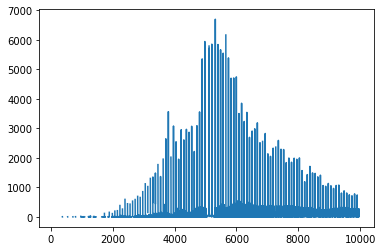

In [ ]:
result_df['случаи заболевания'].plot()

А теперь давайте визуализируем случаи заболевания по месяцам, используя гистограмму, чтобы визуализировать тенденцию на более высоком уровне.

In [ ]:
result_df

,дата,случаи заболевания,количество смертей,cases_per_million,deaths_per_million
0,25.02.2020,NaN,NaN,NaN,NaN
1,25.02.2020,NaN,NaN,NaN,NaN
2,25.02.2020,NaN,NaN,NaN,NaN
3,25.02.2020,NaN,NaN,NaN,NaN
4,25.02.2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9957,30.06.2020,144.0,NaN,0.986744,NaN
9958,30.06.2020,5.0,NaN,0.034262,NaN
9959,30.06.2020,NaN,NaN,NaN,NaN
9960,30.06.2020,248.0,NaN,1.699393,NaN


In [ ]:
covid_df['Месяц'] = pd.DatetimeIndex(result_df['дата']).month

In [ ]:
covid_df

,Регион,Федеральный округ,дата,случаи заболевания,население,количество смертей,location,Месяц
0,Республика Бурятия,Дальневосточный федеральный округ,25.02.2020,NaN,986109,NaN,Russia,2
1,Алтайский край,Сибирский федеральный округ,25.02.2020,NaN,2317052,NaN,Russia,2
2,Амурская область,Дальневосточный федеральный округ,25.02.2020,NaN,790676,NaN,Russia,2
3,Архангельская область,Северо-Западный федеральный округ,25.02.2020,NaN,1092277,NaN,Russia,2
4,Астраханская область,Южный федеральный округ,25.02.2020,NaN,1005967,NaN,Russia,2
...,...,...,...,...,...,...,...,...
9957,Челябинская область,Уральский федеральный округ,30.06.2020,144.0,3466960,NaN,Russia,6
9958,Чеченская Республика,Северо-Кавказский федеральный округ,30.06.2020,5.0,1476752,NaN,Russia,6
9959,Чукотский АО,Дальневосточный федеральный округ,30.06.2020,NaN,50726,NaN,Russia,6
9960,Ямало-Ненецкий автономный округ,Уральский федеральный округ,30.06.2020,248.0,544008,NaN,Russia,6


In [ ]:
covid_month_df = covid_df.groupby('Месяц')['случаи заболевания','население'].sum()

covid_month_df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,случаи заболевания,население
Месяц,,
1,17408.0,439920318
2,19257.0,586665416
3,22072.0,3226817276
4,110766.0,3080641449
5,193086.0,3228077180
6,156800.0,3228077180
7,21373.0,586665416
8,20862.0,586665416
9,20888.0,586665416


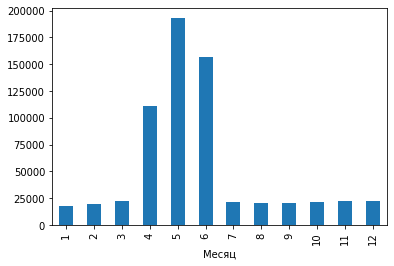

In [ ]:
covid_month_df['случаи заболевания'].plot(kind='bar')

In [ ]:
covid_month_df2 = covid_df.groupby('Месяц')['случаи заболевания'].sum()

covid_month_df2

Месяц
1      17408.0
2      19257.0
3      22072.0
4     110766.0
5     193086.0
6     156800.0
7      21373.0
8      20862.0
9      20888.0
10     21205.0
11     22110.0
12     22078.0
Name: случаи заболевания, dtype: float64

In [ ]:
covid_month_df2['случаи заболевания'].plot(kind='bar')

KeyError: ignored